# AM 205 - Assignment 3

## By Jonathan Guillotte-Blouin

In [7]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sys
from scipy.integrate import quad

### Question 1: Convergence rates of two integrals

#### a) Numerically evaluate $I_A$ using the composite trapezoid rule with $n$ intervals of equal size $h$, for $n = 1, 2, ..., 50$.

In [55]:
def f(x):
    return 1/(5/4 - np.cos(x))

def composite_trapezoid(a, b, n, f):
    js = np.linspace(a, b, n+1)
    h = (b - a) / n
    
    inner_sum = 0
    for j in js:
        if j == a or j == b:
            inner_sum += f(j)/2
        else:
            inner_sum += f(j)
            
    return (h, inner_sum * h)

# compute I_A and its absolute error
a_1a = 0
b_1a = np.pi/3
real_value_1a = 8*np.pi/9
I_1A_h = []
I_1A_abserr = []
for n in range(1, 51):
    h, I_A = composite_trapezoid(a_1a, b_1a, n, f)
    I_1A_h.append(h)
    I_1A_abserr.append(abs(I_A - real_value_1a))

$$f''(x) = \frac{-\cos(x)}{(\frac{5}{4} - \cos(x))^2} + \frac{2 \sin^2(x)}{(\frac{5}{4} - \cos(x))^3}$$

In the range $0 \leq x \leq \frac{\pi}{3}$, $||f||_{\infty} = 16$. Indeed, $|f''(0)| = 16$ and $f'''(0) = 0$, so the point $x = 0$ is a local maximum. The other maximum is lesser (see next figure), so we can safely say $||f||_{\infty} = 16$.

The maximum value of f'' is 16.0


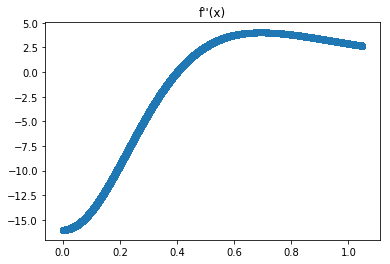

In [58]:
# f''(x)
def f2(x):
    term1 = -np.cos(x) / (5/4 - np.cos(x))**2
    term2 = 2*np.sin(x)**2 / (5/4 - np.cos(x))**3
    
    return term1 + term2

f2_domain = np.linspace(a_1a, b_1a, 100000)
plt.scatter(f2_domain, f2(f2_domain))
plt.title("f''(x)")
print("The maximum value of f'' is",  max([abs(f2(x)) for x in np.linspace(a_1a, b_1a, 100000)]))

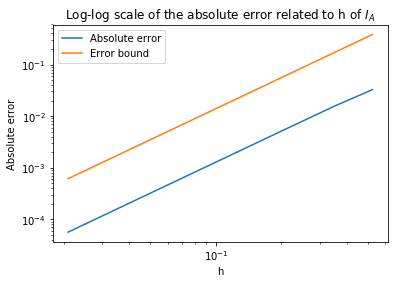

In [64]:
I_1A_errbound = [16 / 36 * np.pi * h**2 for h in I_1A_h]
plt.loglog(I_1A_h[1:], I_1A_abserr[1:], label="Absolute error") # removed the first entry, which has an error of 0
plt.loglog(I_1A_h[1:], I_1A_errbound[1:], label="Error bound") # removed the first entry, which has an error of 0
plt.title(r"Log-log scale of the absolute error related to h of $I_A$")
plt.xlabel("h")
plt.ylabel("Absolute error")
plt.legend()

We can see that the numerically computed results all have an absolute error (in blue) smaller than the error bound (in orange).

#### a) Numerically evaluate $I_B$ using the composite trapezoid rule with $n$ intervals of equal size $h$, for $n = 1, 2, ..., 50$.

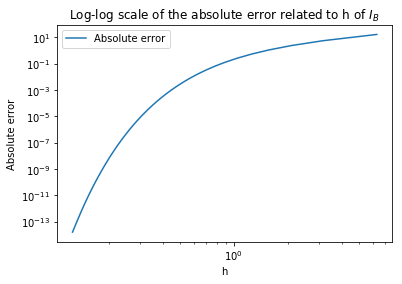

In [121]:
# compute I_B and its absolute error
a_1b = 0
b_1b = 2*np.pi
real_value_1b = 8*np.pi/3
I_1B_h = []
I_1B_abserr = []
for n in range(1, 51):
    h, I_B = composite_trapezoid(a_1b, b_1b, n, f)
    I_1B_h.append(h)
    I_1B_abserr.append(abs(I_B - real_value_1b))

plt.loglog(I_1B_h, I_1B_abserr, label="Absolute error")

plt.title(r"Log-log scale of the absolute error related to h of $I_B$")
plt.xlabel("h")
plt.ylabel("Absolute error")
plt.legend()

What the last part of the question wants to know is if the absolute error (err) scales with $ h^m$ for some $m$. So,

$$ m \stackrel{?}{=} \log_h(\texttt{err}) \, \forall \, h$$ 

All the m values computed
[  1.53367511   1.50262001   1.18062729   0.24504065  -2.69341255
 -28.71850417  18.74870843  11.2705199    9.51074703   8.84811153
   8.58083579   8.49855373   8.51646394   8.59393758   8.70915289
   8.8493957    9.0067933    9.17623547   9.3542784    9.53852975
   9.72728548   9.91930638  10.11367545  10.30970416  10.50686908
  10.7047683   10.90309044  11.10159278  11.30008495  11.49841726
  11.69647134  11.89415426  12.0913916   12.2881274   12.4843139
  12.67991291  12.87491003  13.06929679  13.26299766  13.45609057
  13.64824066  13.84009901  14.03043892  14.22180494  14.40964573
  14.60437194  14.78902499  14.9695042   15.1566986   15.31569533]


Text(0,0.5,'m')

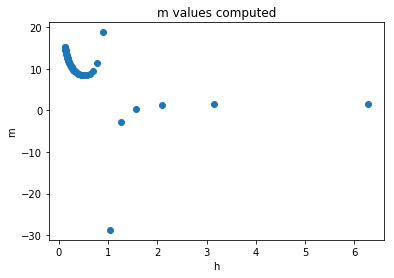

In [132]:
ms = np.log(I_1B_abserr) / np.log(I_1B_h)
print("All the m values computed")
print(ms)

plt.scatter(I_1B_h, ms, label="Absolute error")
plt.title("m values computed")
plt.xlabel("h")
plt.ylabel("m")

There does not seem to be a $m$ such that the absolute error would scale proportionally to $h^m$.

### Question 2: Adaptive integration

#### a) Derive the 3-point Gauss quadrature.



$$P_3(x) = \frac{1}{2}x(5x^2-3)$$

Our goal is to find the following quadrature: $w_1x_1 + w_2x_2 + w_3x_3$.

Let's find the roots of $P_3(x)$. $x_2 = 0$ is a trivial solution. The other roots are when $5x^2 - 3 = 0$. If we solve this equation, we will find that $x_1 = -\sqrt{\frac{3}{5}}$ and $x_3 = \sqrt{\frac{3}{5}}$.

The weights of the quadrature can be determined by hand by this integral:

$$ w_k = \int_a^b \mathcal{L}_k(x)dx \; \texttt{, where } a = -1, b = 1$$


Let's find $w_1$.

$$\mathcal{L}_1(x) = \frac{(x-0)(x-\sqrt{\frac{3}{5}})}{(-\sqrt{\frac{3}{5}})(-2\sqrt{\frac{3}{5}})} = \frac{5}{6}(x^2 - \sqrt{\frac{3}{5}}x)$$

$$w_1 = \int_{-1}^1 \frac{5}{6}(x^2 - \sqrt{\frac{3}{5}}x)dx = \frac{5}{9}$$


Let's find $w_2$.

$$\mathcal{L}_2(x) = \frac{(x+\sqrt{\frac{3}{5}})(x-\sqrt{\frac{3}{5}})}{(\sqrt{\frac{3}{5}})(-\sqrt{\frac{3}{5}})} = 1 - \frac{5}{3}x^2$$

$$w_2 = \int_{-1}^1 1 - \frac{5}{3}x^2dx = \frac{8}{9}$$


Let's find $w_3$.

$$\mathcal{L}_3(x) = \frac{(x+\sqrt{\frac{3}{5}})(x-0)}{(2\sqrt{\frac{3}{5}})(\sqrt{\frac{3}{5}})} = \frac{5}{6}(x^2 + \sqrt{\frac{3}{5}}x)$$

$$w_3 = \int_{-1}^1 \frac{5}{6}(x^2 + \sqrt{\frac{3}{5}}x)dx = \frac{5}{9}$$


The Gauss quadrature therefore is: 

$$\int_{-1}^1 f(x)dx \approx \sum_{k=1}^3 w_kf(x_k) = \frac{5}{9} f(-\sqrt{\frac{3}{5}}) + \frac{8}{9} f(0) + \frac{5}{9} f(\sqrt{\frac{3}{5}})$$

Our quadrature should work with functions up to order $2n-1$, therefore 5, over the range $[-1,1]$. Let's test this.

In [24]:
def gauss_quad(f):
    return 5/9 * f(-np.sqrt(3/5)) + 8/9 * f(0) + 5/9 * f(np.sqrt(3/5))
    
one_2a = lambda _:  1
twoX_2a = lambda x: 2*x
x2_2a = lambda x: x**2
x3_2a = lambda x: 16 * x**3 + 1
x4_2a = lambda x: x**4
x5_2a = lambda x: x**5
x6_2a = lambda x: x**6

print("The result on the left is obtained using `scipy.integrate.quad`; on the right is the Gauss quadrature we derived.")
print("Test with f(x) = 1: ", quad(one_2a, -1, 1)[0], gauss_quad(one_2a))
print("Test with f(x) = 2x: ", quad(twoX_2a, -1, 1)[0], gauss_quad(twoX_2a))
print("Test with f(x) = x^2: ", quad(x2_2a, -1, 1)[0], gauss_quad(x2_2a))
print("Test with f(x) = 16x^3 + 1: ", quad(x3_2a, -1, 1)[0], gauss_quad(x3_2a))
print("Test with f(x) = x^4: ", quad(x4_2a, -1, 1)[0], gauss_quad(x4_2a))
print("Test with f(x) = x^5: ", quad(x5_2a, -1, 1)[0], gauss_quad(x5_2a))

# test, but should not work (degree 6)
print("\nThe following test should not work, as we are testing a function of degree 6.")
print("Test with f(x) = x^6: ", quad(x6_2a, -1, 1)[0], gauss_quad(x6_2a))

The result on the left is obtained using `scipy.integrate.quad`; on the right is the Gauss quadrature we derived.
Test with f(x) = 1:  2.0 2.0
Test with f(x) = 2x:  0.0 0.0
Test with f(x) = x^2:  0.6666666666666666 0.6666666666666667
Test with f(x) = 16x^3 + 1:  2.0 2.0
Test with f(x) = x^4:  0.4 0.4000000000000001
Test with f(x) = x^5:  0.0 0.0

The following test should not work, as we are testing a function of degree 6.
Test with f(x) = x^6:  0.2857142857142857 0.24000000000000007
